FEATURES (BEFORE PCA) CONCATENATION

In [39]:
import os
import numpy as np

def load_data(root_folder, user_id, model_name, label):
    features_list = []
    labels_list = []

    folder_path = os.path.join(root_folder, f"u{user_id.zfill(2)}", model_name)

    for filename in os.listdir(folder_path):
        if filename.endswith(".npy"):
            filepath = os.path.join(folder_path, filename)
            feature = np.load(filepath, allow_pickle=True)

            # Ensure the feature has consistent shape (adjust based on your data)
            if feature.shape == ():
                continue  # Skip empty features

            # Flatten the feature to a one-dimensional array if necessary
            feature = np.ravel(feature)

            features_list.append(feature)
            labels_list.append(label)

    return features_list, labels_list

root_folder = "D:/rp/dataset/ATVFS/features_new" 

fake_models = ["fake_feature_densenet121", "fake_feature_efficientnetb0", "fake_feature_resnet50","fake_feature_alexnet",
                "fake_feature_inceptionv3", "fake_feature_vgg16"]
original_models = ["original_feature_densenet121", "original_feature_efficientnetb0",  "original_feature_resnet50",
                   "original_feature_alexnet", "original_feature_inceptionv3", "original_feature_vgg16"]

# Load features and labels for fake data
fake_features_list = []
fake_labels_list = []

for user_id in range(1, 5):  # Assuming user IDs u01 to u04
    for model_name in fake_models:
        features, labels = load_data(root_folder, str(user_id).zfill(2), model_name, label=0)
        fake_features_list.extend(features)
        fake_labels_list.extend(labels)

# Load features and labels for original data
original_features_list = []
original_labels_list = []

for user_id in range(1, 5):  # Assuming user IDs u01 to u04
    for model_name in original_models:
        features, labels = load_data(root_folder, str(user_id).zfill(2), model_name, label=1)
        original_features_list.extend(features)
        original_labels_list.extend(labels)

# Find the maximum dimension for both fake and original features
max_fake_dimension = max(feature.shape[0] for feature in fake_features_list)
max_original_dimension = max(feature.shape[0] for feature in original_features_list)

# Pad or reshape the features to have the same dimensions
fake_features_list = [np.pad(feature, (0, max_fake_dimension - feature.shape[0]), 'constant') if feature.shape[0] < max_fake_dimension else feature for feature in fake_features_list]
original_features_list = [np.pad(feature, (0, max_original_dimension - feature.shape[0]), 'constant') if feature.shape[0] < max_original_dimension else feature for feature in original_features_list]

# Stack features along a new axis for both fake and original data
all_fake_features = np.stack(fake_features_list, axis=1)  # Adjust axis if needed
all_fake_labels = np.array(fake_labels_list)

all_original_features = np.stack(original_features_list, axis=1)  # Adjust axis if needed
all_original_labels = np.array(original_labels_list)

print(len(fake_features_list))
print(len(original_features_list))



1152
1152


In [40]:
print(all_fake_features)
print(all_fake_labels)
print(all_original_features)
print(all_original_labels)
print(len(all_fake_features))
print(len(all_fake_labels))
print(len(all_original_features))
print(len(all_original_labels))

[[0.         0.         0.00066743 ... 0.         0.         0.        ]
 [0.0047849  0.0075288  0.01943073 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[0 0 0 ... 0 0 0]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00150675 0.00538038 0.01329131 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[1 1 1 ... 1 1 1]
131072
1152
131072
1152


In [41]:
from sklearn.metrics.pairwise import rbf_kernel

# Set the gamma parameter for the RBF kernel (you might need to adjust this)
gamma = 1.0 / all_fake_features.shape[0]  # Adjust gamma as needed
gamma = 1.0 / all_original_features.shape[0]
# Apply RBF kernel to fake features
all_fake_features = rbf_kernel(all_fake_features.T, gamma=gamma)

# Apply RBF kernel to original features
all_original_features = rbf_kernel(all_original_features.T, gamma=gamma)


print(all_fake_features)
print(all_original_features)
print(len(all_fake_features))
print(len(all_original_features))


[[1.0000000e+00 7.0014352e-01 7.0671576e-01 ... 4.6463036e-05
  4.1350449e-06 2.7574189e-03]
 [7.0014352e-01 1.0000000e+00 6.4843917e-01 ... 4.8052181e-05
  4.1259300e-06 2.8378163e-03]
 [7.0671576e-01 6.4843917e-01 1.0000000e+00 ... 4.7974750e-05
  4.2467759e-06 2.8834499e-03]
 ...
 [4.6463036e-05 4.8052181e-05 4.7974750e-05 ... 1.0000000e+00
  1.3993655e-05 1.0063327e-05]
 [4.1350449e-06 4.1259300e-06 4.2467759e-06 ... 1.3993655e-05
  1.0000000e+00 9.0996423e-07]
 [2.7574189e-03 2.8378163e-03 2.8834499e-03 ... 1.0063327e-05
  9.0996423e-07 1.0000000e+00]]
[[1.0000000e+00 7.8205645e-01 7.8597564e-01 ... 4.7976174e-04
  1.2182771e-03 2.2377873e-04]
 [7.8205645e-01 1.0000000e+00 8.0275476e-01 ... 4.4002640e-04
  1.1147797e-03 2.0641035e-04]
 [7.8597564e-01 8.0275476e-01 1.0000000e+00 ... 4.2376795e-04
  1.0552508e-03 1.9668184e-04]
 ...
 [4.7976174e-04 4.4002640e-04 4.2376795e-04 ... 1.0000000e+00
  1.4918220e-03 2.8085927e-02]
 [1.2182771e-03 1.1147797e-03 1.0552508e-03 ... 1.4918220e-

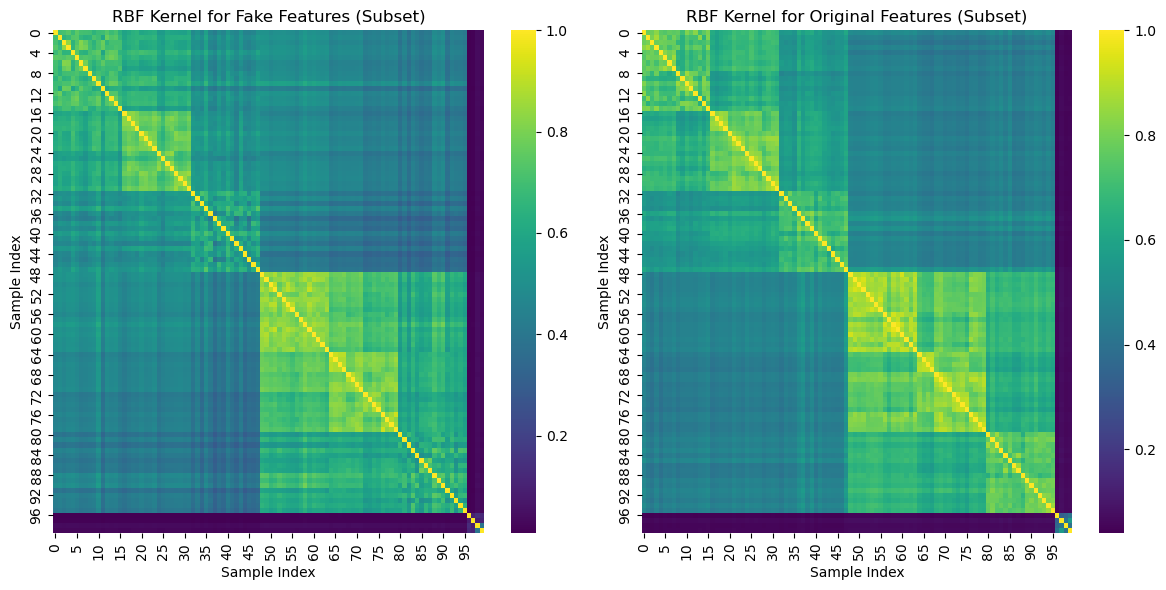

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot RBF kernel matrices
plt.figure(figsize=(12, 6))

# Plot RBF kernel for fake features
plt.subplot(1, 2, 1)
sns.heatmap(all_fake_features[:100, :100], cmap='viridis')
plt.title('RBF Kernel for Fake Features (Subset)')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')

# Plot RBF kernel for original features
plt.subplot(1, 2, 2)
sns.heatmap(all_original_features[:100, :100], cmap='viridis')
plt.title('RBF Kernel for Original Features (Subset)')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')

plt.tight_layout()
plt.show()

In [43]:
# Save fake features and labels
np.save("./EDRAIV/all_fake_features.npy", all_fake_features)
np.save("./EDRAIV/all_fake_labels.npy", all_fake_labels)

# Save original features and labels
np.save("./EDRAIV/all_original_features.npy", all_original_features)
np.save("./EDRAIV/all_original_labels.npy", all_original_labels)


PCA APPLIED FOR CONCATENATED LIST

In [44]:
import os
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA to fake features
pca_fake = PCA()
pca_fake.fit(all_fake_features)

pca_original = PCA()
pca_original.fit(all_original_features)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca_fake.explained_variance_ratio_)

# Find the number of components to retain 95% of the variance
desired_variance_ratio = 0.95
desired_components = np.argmax(cumulative_explained_variance >= desired_variance_ratio) + 1

print(f"Desired number of components to retain {desired_variance_ratio * 100}% variance: {desired_components}")

# Apply PCA with the desired number of components
pca_fake = PCA(n_components=desired_components)
pca_fake_features = pca_fake.fit_transform(all_fake_features)

pca_original = PCA(n_components=desired_components)
pca_original_features = pca_fake.fit_transform(all_original_features)



Desired number of components to retain 95.0% variance: 2


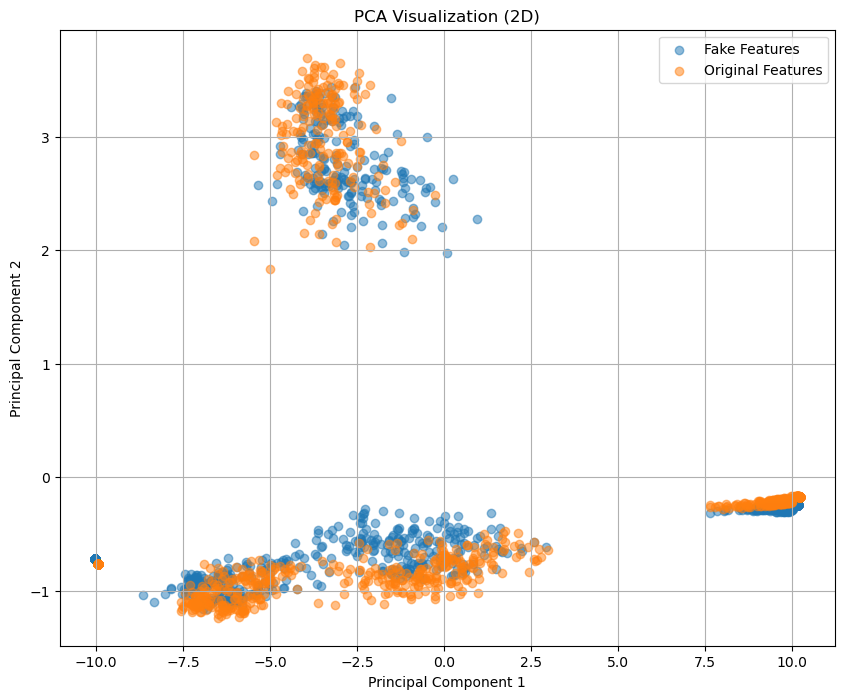

In [45]:
import matplotlib.pyplot as plt

# Project fake features onto the 2D space
pca_fake_2d = PCA(n_components=2)
fake_features_2d = pca_fake_2d.fit_transform(all_fake_features)

# Project original features onto the 2D space
pca_original_2d = PCA(n_components=2)
original_features_2d = pca_original_2d.fit_transform(all_original_features)

# Plot PCA results
plt.figure(figsize=(10, 8))
plt.scatter(fake_features_2d[:, 0], fake_features_2d[:, 1], label='Fake Features', alpha=0.5)
plt.scatter(original_features_2d[:, 0], original_features_2d[:, 1], label='Original Features', alpha=0.5)
plt.title('PCA Visualization (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
print(len(pca_fake_features))
print(len(pca_original_features))
print(f"Number of features after PCA: {pca_fake_features.shape[1]}")
print(f"Number of features after PCA: {pca_original_features.shape[1]}")

1152
1152
Number of features after PCA: 2
Number of features after PCA: 2


In [47]:
np.save("./EDRAIV/all_fake_features_pca.npy", pca_fake_features)

np.save("./EDRAIV/all_original_features_pca.npy", pca_original_features)


SVM CLASSIFIER - feature concatenation+pca

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

fake_features = np.load("./EDRAIV/all_fake_features.npy")
original_features = np.load("./EDRAIV/all_original_features.npy")

fake_labels = np.load("./EDRAIV/all_fake_labels.npy")
original_labels = np.load("./EDRAIV/all_original_labels.npy")

all_features = np.concatenate((fake_features, original_features), axis=0)
all_labels = np.concatenate((fake_labels, original_labels), axis=0)

all_features_reshaped = all_features[:2304, :]

X_train, X_test, y_train, y_test = train_test_split(all_features_reshaped, all_labels, test_size=0.2, random_state=42)

X_train_svm = X_train.reshape(X_train.shape[0], -1) 
X_test_svm = X_test.reshape(X_test.shape[0], -1)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_svm, y_train)

y_pred_svm = svm_classifier.predict(X_test_svm)

accuracy_svm_4 = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm_4 * 100:.2f}%")

# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# fake_features = np.load("./EDRAIV/all_fake_features.npy")
# original_features = np.load("./EDRAIV/all_original_features.npy")

# fake_labels = np.load("./EDRAIV/all_fake_labels.npy")
# original_labels = np.load("./EDRAIV/all_original_labels.npy")

# # Adjust the size of the arrays to match along dimension 1 (number of features)
# min_num_features = min(fake_features.shape[1], original_features.shape[1])
# fake_features = fake_features[:, :min_num_features]
# original_features = original_features[:, :min_num_features]

# all_features = np.concatenate((fake_features, original_features), axis=0)
# all_labels = np.concatenate((fake_labels, original_labels), axis=0)

# all_features_reshaped = all_features[:2304, :]

# X_train, X_test, y_train, y_test = train_test_split(all_features_reshaped, all_labels, test_size=0.2, random_state=42)

# X_train_svm = X_train.reshape(X_train.shape[0], -1) 
# X_test_svm = X_test.reshape(X_test.shape[0], -1)

# svm_classifier = SVC(kernel='linear')
# svm_classifier.fit(X_train_svm, y_train)

# y_pred_svm = svm_classifier.predict(X_test_svm)

# accuracy_svm_4 = accuracy_score(y_test, y_pred_svm)
# print(f"SVM Accuracy: {accuracy_svm_4 * 100:.2f}%")


SVM Accuracy: 80.69%


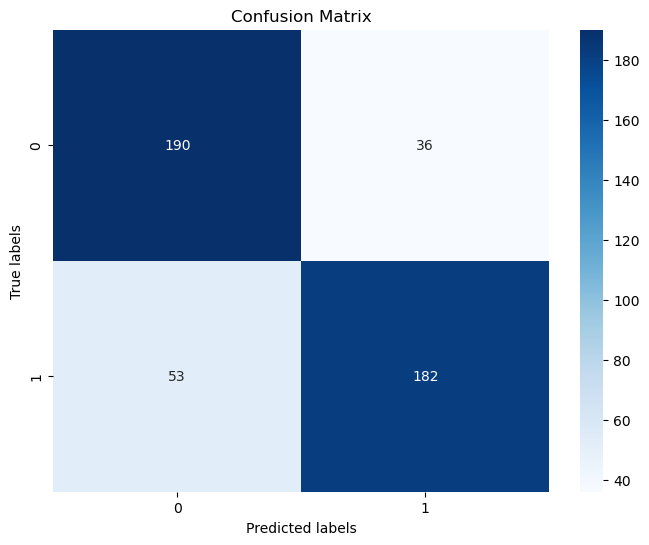

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [50]:
print("Features shape:", all_features.shape)
print("Labels shape:", all_labels.shape)


Features shape: (2304, 1152)
Labels shape: (2304,)


SVM CLASSIFIER - pca applied feature concatenation

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load features and labels
fake_features = np.load("./EDRAIV/all_fake_features_pca.npy")
original_features = np.load("./EDRAIV/all_original_features_pca.npy")

fake_labels = np.load("./EDRAIV/all_fake_labels.npy")
original_labels = np.load("./EDRAIV/all_original_labels.npy")

# Combine features and labels
all_features = np.concatenate((fake_features, original_features), axis=0)
all_labels = np.concatenate((fake_labels, original_labels), axis=0)

# Reshape features to match the number of labels
all_features_reshaped = all_features[:2304, :]

# Now you can proceed to split the data
X_train, X_test, y_train, y_test = train_test_split(all_features_reshaped, all_labels, test_size=0.2, random_state=42)

# Reshape features for SVM
X_train_svm = X_train.reshape(X_train.shape[0], -1)  # Flatten the features
X_test_svm = X_test.reshape(X_test.shape[0], -1)

# Train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_svm, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_svm)

# Evaluate the SVM model
accuracy_svm_pca_4 = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm_pca_4 * 100:.2f}%")


SVM Accuracy: 48.37%


3 models efficientnet,resnet,densenet

In [52]:
import os
import numpy as np

def load_data(root_folder, user_id, model_name, label):
    features_list = []
    labels_list = []

    folder_path = os.path.join(root_folder, f"u{user_id.zfill(2)}", model_name)

    for filename in os.listdir(folder_path):
        if filename.endswith(".npy"):
            filepath = os.path.join(folder_path, filename)
            feature = np.load(filepath, allow_pickle=True)

            # Ensure the feature has consistent shape (adjust based on your data)
            if feature.shape == ():
                continue  # Skip empty features

            # Flatten the feature to a one-dimensional array if necessary
            feature = np.ravel(feature)

            features_list.append(feature)
            labels_list.append(label)

    return features_list, labels_list

root_folder = "D:/rp/dataset/ATVFS/features_new" 


fake_models = ["fake_feature_densenet121", "fake_feature_efficientnetb0", "fake_feature_resnet50","fake_feature_alexnet","fake_feature_vgg16"]
original_models = ["original_feature_densenet121", "original_feature_efficientnetb0", "original_feature_resnet50","original_feature_alexnet","original_feature_vgg16"]

# Load features and labels for fake data
fake_features_list = []
fake_labels_list = []

for user_id in range(1, 5):  # Assuming user IDs u01 to u04
    for model_name in fake_models:
        features, labels = load_data(root_folder, str(user_id).zfill(2), model_name, label=0)
        fake_features_list.extend(features)
        fake_labels_list.extend(labels)

# Load features and labels for original data
original_features_list = []
original_labels_list = []

for user_id in range(1, 5):  # Assuming user IDs u01 to u04
    for model_name in original_models:
        features, labels = load_data(root_folder, str(user_id).zfill(2), model_name, label=1)
        original_features_list.extend(features)
        original_labels_list.extend(labels)

# Find the maximum dimension for both fake and original features
max_fake_dimension = max(feature.shape[0] for feature in fake_features_list)
max_original_dimension = max(feature.shape[0] for feature in original_features_list)

# Pad or reshape the features to have the same dimensions
fake_features_list = [np.pad(feature, (0, max_fake_dimension - feature.shape[0]), 'constant') if feature.shape[0] < max_fake_dimension else feature for feature in fake_features_list]
original_features_list = [np.pad(feature, (0, max_original_dimension - feature.shape[0]), 'constant') if feature.shape[0] < max_original_dimension else feature for feature in original_features_list]

# Stack features along a new axis for both fake and original data
all_fake_features_2 = np.stack(fake_features_list, axis=1)  # Adjust axis if needed
all_fake_labels_2 = np.array(fake_labels_list)

all_original_features_2 = np.stack(original_features_list, axis=1)  # Adjust axis if needed
all_original_labels_2 = np.array(original_labels_list)

# Use the stacked features and labels for further processing or classification



In [53]:
print(len(all_fake_features))
print(len(all_fake_labels))
print(len(all_original_features))
print(len(all_original_labels))

1152
1152
1152
1152


In [54]:
from sklearn.metrics.pairwise import rbf_kernel

# Set the gamma parameter for the RBF kernel (you might need to adjust this)
gamma = 1.0 / all_fake_features.shape[0]  # Adjust gamma as needed
gamma = 1.0 / all_original_features.shape[0]
# Apply RBF kernel to fake features
all_fake_features = rbf_kernel(all_fake_features.T, gamma=gamma)

# Apply RBF kernel to original features
all_original_features = rbf_kernel(all_original_features.T, gamma=gamma)


print(all_fake_features)
print(all_original_features)
print(len(all_fake_features))
print(len(all_original_features))


[[1.         0.99954426 0.9996324  ... 0.8422228  0.8421974  0.84394723]
 [0.99954426 1.         0.9990576  ... 0.83639455 0.8363688  0.8381444 ]
 [0.9996324  0.9990576  1.         ... 0.840262   0.8402366  0.84198624]
 ...
 [0.8422228  0.83639455 0.840262   ... 1.         0.9982655  0.99825823]
 [0.8421974  0.8363688  0.8402366  ... 0.9982655  1.         0.9982581 ]
 [0.84394723 0.8381444  0.84198624 ... 0.99825823 0.9982581  1.        ]]
[[1.         0.9989738  0.9974639  ... 0.82837963 0.82880723 0.8282272 ]
 [0.9989738  1.         0.9993834  ... 0.8453723  0.8457815  0.84522676]
 [0.9974639  0.9993834  1.         ... 0.8557643  0.85616    0.85562366]
 ...
 [0.82837963 0.8453723  0.8557643  ... 1.         0.998269   0.9983613 ]
 [0.82880723 0.8457815  0.85616    ... 0.998269   1.         0.99827033]
 [0.8282272  0.84522676 0.85562366 ... 0.9983613  0.99827033 1.        ]]
1152
1152


In [55]:
# Save fake features and labels
np.save("./DERAV/all_fake_features_2.npy", all_fake_features)
np.save("./DERAV/all_fake_labels_2.npy", all_fake_labels)

# Save original features and labels
np.save("./DERAV/all_original_features_2.npy", all_original_features)
np.save("./DERAV/all_original_labels_2.npy", all_original_labels)


In [56]:
import os
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA to fake features
pca_fake = PCA()
pca_fake.fit(all_fake_features)

pca_original = PCA()
pca_original.fit(all_original_features)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca_fake.explained_variance_ratio_)

# Find the number of components to retain 95% of the variance
desired_variance_ratio = 0.95
desired_components = np.argmax(cumulative_explained_variance >= desired_variance_ratio) + 1

print(f"Desired number of components to retain {desired_variance_ratio * 100}% variance: {desired_components}")

# Apply PCA with the desired number of components
pca_fake = PCA(n_components=desired_components)
pca_fake_features = pca_fake.fit_transform(all_fake_features)

pca_original = PCA(n_components=desired_components)
pca_original_features = pca_fake.fit_transform(all_original_features)



Desired number of components to retain 95.0% variance: 2


In [57]:
print(len(pca_fake_features))
print(len(pca_original_features))
print(f"Number of features after PCA: {pca_fake_features.shape[1]}")
print(f"Number of features after PCA: {pca_original_features.shape[1]}")

1152
1152
Number of features after PCA: 2
Number of features after PCA: 2


In [58]:
np.save("./DERIV/all_fake_features_2_pca.npy", pca_fake_features)

np.save("./DERIV/all_original_features_2_pca.npy", pca_original_features)


In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

fake_features = np.load("./EDRAIV/all_fake_features.npy")
original_features = np.load("./EDRAIV/all_original_features.npy")

fake_labels = np.load("./EDRAIV/all_fake_labels.npy")
original_labels = np.load("./EDRAIV/all_original_labels.npy")

all_features = np.concatenate((fake_features, original_features), axis=0)
all_labels = np.concatenate((fake_labels, original_labels), axis=0)

all_features_reshaped = all_features[:2304, :]

X_train, X_test, y_train, y_test = train_test_split(all_features_reshaped, all_labels, test_size=0.2, random_state=42)

X_train_svm = X_train.reshape(X_train.shape[0], -1) 
X_test_svm = X_test.reshape(X_test.shape[0], -1)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_svm, y_train)

y_pred_svm = svm_classifier.predict(X_test_svm)

accuracy_svm_4 = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm_4 * 100:.2f}%")

SVM Accuracy: 80.69%


In [60]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load features and labels
fake_features = np.load("./DERAV/all_fake_features_2_pca.npy")
original_features = np.load("./DERAV/all_original_features_2_pca.npy")

fake_labels = np.load("./DERAV/all_fake_labels_2.npy")
original_labels = np.load("./DERAV/all_original_labels_2.npy")

# Find the minimum number of samples
min_samples = min(fake_features.shape[0], original_features.shape[0], fake_labels.shape[0], original_labels.shape[0])

# Extract the first 'min_samples' samples from both features and labels
fake_features = fake_features[:min_samples]
original_features = original_features[:min_samples]
fake_labels = fake_labels[:min_samples]
original_labels = original_labels[:min_samples]

# Combine features and labels
all_features = np.concatenate((fake_features, original_features), axis=0)
all_labels = np.concatenate((fake_labels, original_labels), axis=0)

# Now you can proceed to split the data
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42)

# Reshape features for SVM
X_train_svm = X_train.reshape(X_train.shape[0], -1)  # Flatten the features
X_test_svm = X_test.reshape(X_test.shape[0], -1)

# Train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_svm, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_svm)

# Evaluate the SVM model
accuracy_svm_pca_edr = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm_pca_edr * 100:.2f}%")


SVM Accuracy: 99.12%


3 models mobilenet,resnet,densenet

In [61]:
import os
import numpy as np

def load_data(root_folder, user_id, model_name, label):
    features_list = []
    labels_list = []

    folder_path = os.path.join(root_folder, f"u{user_id.zfill(2)}", model_name)

    for filename in os.listdir(folder_path):
        if filename.endswith(".npy"):
            filepath = os.path.join(folder_path, filename)
            feature = np.load(filepath, allow_pickle=True)

            # Ensure the feature has consistent shape (adjust based on your data)
            if feature.shape == ():
                continue  # Skip empty features

            # Flatten the feature to a one-dimensional array if necessary
            feature = np.ravel(feature)

            features_list.append(feature)
            labels_list.append(label)

    return features_list, labels_list

root_folder = "D:/rp/dataset/ATVFS/features_new"  # Change this to your actual root folder

# Define models for both fake and original features
fake_models = ["fake_feature_vgg16", "fake_feature_efficientnetb0", "fake_feature_resnet50"]
original_models = ["original_feature_vgg16", "original_feature_efficientnetb0", "original_feature_resnet50"]

# Load features and labels for fake data
fake_features_list = []
fake_labels_list = []

for user_id in range(1, 5):  # Assuming user IDs u01 to u04
    for model_name in fake_models:
        features, labels = load_data(root_folder, str(user_id).zfill(2), model_name, label=0)
        fake_features_list.extend(features)
        fake_labels_list.extend(labels)

# Load features and labels for original data
original_features_list = []
original_labels_list = []

for user_id in range(1, 5):  # Assuming user IDs u01 to u04
    for model_name in original_models:
        features, labels = load_data(root_folder, str(user_id).zfill(2), model_name, label=1)
        original_features_list.extend(features)
        original_labels_list.extend(labels)

# Find the maximum dimension for both fake and original features
max_fake_dimension = max(feature.shape[0] for feature in fake_features_list)
max_original_dimension = max(feature.shape[0] for feature in original_features_list)

# Pad or reshape the features to have the same dimensions
fake_features_list = [np.pad(feature, (0, max_fake_dimension - feature.shape[0]), 'constant') if feature.shape[0] < max_fake_dimension else feature for feature in fake_features_list]
original_features_list = [np.pad(feature, (0, max_original_dimension - feature.shape[0]), 'constant') if feature.shape[0] < max_original_dimension else feature for feature in original_features_list]

# Stack features along a new axis for both fake and original data
all_fake_features_3 = np.stack(fake_features_list, axis=1)  # Adjust axis if needed
all_fake_labels_3 = np.array(fake_labels_list)

all_original_features_3 = np.stack(original_features_list, axis=1)  # Adjust axis if needed
all_original_labels_3 = np.array(original_labels_list)

# Use the stacked features and labels for further processing or classification


In [62]:
print(all_fake_features_3)
print(all_fake_labels_3)
print(all_original_features_3)
print(all_original_labels_3)
print(len(all_fake_features_3))
print(len(all_fake_labels_3))
print(len(all_original_features_3))
print(len(all_original_labels_3))

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        2.7268095 0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [64]:
# Save fake features and labels
np.save("./MRD/all_fake_features_3.npy", all_fake_features_3)
np.save("./MRD/all_fake_labels_3.npy", all_fake_labels_3)

# Save original features and labels
np.save("./MRD/all_original_features_3.npy", all_original_features_3)
np.save("./MRD/all_original_labels_3.npy", all_original_labels_3)


In [65]:
import os
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA to fake features
pca_fake = PCA()
pca_fake.fit(all_fake_features_3)

pca_original = PCA()
pca_original.fit(all_original_features_3)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca_fake.explained_variance_ratio_)

# Find the number of components to retain 95% of the variance
desired_variance_ratio = 0.95
desired_components = np.argmax(cumulative_explained_variance >= desired_variance_ratio) + 1

print(f"Desired number of components to retain {desired_variance_ratio * 100}% variance: {desired_components}")

# Apply PCA with the desired number of components
pca_fake = PCA(n_components=10)
pca_fake_features = pca_fake.fit_transform(all_fake_features_3)

pca_original = PCA(n_components=10)
pca_original_features = pca_fake.fit_transform(all_original_features_3)



Desired number of components to retain 95.0% variance: 217


In [ ]:
print(len(pca_fake_features))
print(len(pca_original_features))
print(f"Number of features after PCA: {pca_fake_features.shape[1]}")
print(f"Number of features after PCA: {pca_original_features.shape[1]}")

100352
100352
Number of features after PCA: 10
Number of features after PCA: 10


In [ ]:
np.save("./MRD/all_fake_features_3_pca.npy", pca_fake_features)

np.save("./MRD/all_original_features_3_pca.npy", pca_original_features)


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load features and labels
fake_features = np.load("./MRD/all_fake_features_3.npy")
original_features = np.load("./MRD/all_original_features_3.npy")

fake_labels = np.load("./MRD/all_fake_labels_3.npy")
original_labels = np.load("./MRD/all_original_labels_3.npy")

# Find the minimum number of samples
min_samples = min(fake_features.shape[0], original_features.shape[0], fake_labels.shape[0], original_labels.shape[0])

# Extract the first 'min_samples' samples from both features and labels
fake_features = fake_features[:min_samples]
original_features = original_features[:min_samples]
fake_labels = fake_labels[:min_samples]
original_labels = original_labels[:min_samples]

# Combine features and labels
all_features = np.concatenate((fake_features, original_features), axis=0)
all_labels = np.concatenate((fake_labels, original_labels), axis=0)

# Now you can proceed to split the data
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42)

# Reshape features for SVM
X_train_svm = X_train.reshape(X_train.shape[0], -1)  # Flatten the features
X_test_svm = X_test.reshape(X_test.shape[0], -1)

# Train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_svm, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_svm)

# Evaluate the SVM model
accuracy_svm_mrd = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm_mrd * 100:.2f}%")


SVM Accuracy: 89.18%


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load features and labels
fake_features = np.load("./MRD/all_fake_features_3_pca.npy")
original_features = np.load("./MRD/all_original_features_3_pca.npy")

fake_labels = np.load("./MRD/all_fake_labels_3.npy")
original_labels = np.load("./MRD/all_original_labels_3.npy")

# Find the minimum number of samples
min_samples = min(fake_features.shape[0], original_features.shape[0], fake_labels.shape[0], original_labels.shape[0])

# Extract the first 'min_samples' samples from both features and labels
fake_features = fake_features[:min_samples]
original_features = original_features[:min_samples]
fake_labels = fake_labels[:min_samples]
original_labels = original_labels[:min_samples]

# Combine features and labels
all_features = np.concatenate((fake_features, original_features), axis=0)
all_labels = np.concatenate((fake_labels, original_labels), axis=0)

# Now you can proceed to split the data
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42)

# Reshape features for SVM
X_train_svm = X_train.reshape(X_train.shape[0], -1)  # Flatten the features
X_test_svm = X_test.reshape(X_test.shape[0], -1)

# Train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_svm, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_svm)

# Evaluate the SVM model
accuracy_svm_pca_mrd = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm_pca_mrd * 100:.2f}%")


SVM Accuracy: 56.71%


In [ ]:
import plotly.express as px

# Create a grouped bar chart
fig = px.bar(x=['EDMR', 'EDM', 'EDR', 'MRD'],
             y=[accuracy_svm_mrd,accuracy_svm_edm,accuracy_svm_edr,accuracy_svm_4],
             barmode='group',
             labels={'y': 'Accuracy', 'x': 'Models'},
             title='Comparison of Model Accuracies')

# Show the plot
fig.show()



In [ ]:
import plotly.express as px

# Create a grouped bar chart
fig = px.bar(x=['EDMR', 'EDM', 'EDR', 'MRD'],
             y=[accuracy_svm_pca_mrd, accuracy_svm_pca_edr, accuracy_svm_pca_4],
             barmode='group',
             labels={'y': 'Accuracy', 'x': 'Models'},
             title='Comparison of Model Accuracies')

# Show the plot
fig.show()



In [ ]:
import plotly.express as px

# Accuracy values without PCA
accuracy_without_pca = [accuracy_svm_mrd,accuracy_svm_4,accuracy_svm_edr,accuracy_svm_edm]

# Accuracy values with PCA
accuracy_with_pca = [accuracy_svm_pca_mrd,accuracy_svm_pca_4,accuracy_svm_edr,accuracy_svm_edm]

# Models
model_names = [ 'MRD','EDMR','EDR','EDM']

# Create a grouped bar chart
fig = px.bar(x=model_names * 2,
             y=accuracy_without_pca + accuracy_with_pca,
             color=['Without PCA'] * len(model_names) + ['With PCA'] * len(model_names),
             barmode='group',
             labels={'y': 'Accuracy', 'x': 'Models'},
             title='Comparison of Model Accuracies with and without PCA')

# Show the plot
fig.show()
